<a href="https://colab.research.google.com/github/Lipun101/Fast_food_case_study/blob/main/Fast_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Fast Food

In [153]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
md_data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
md_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [155]:
md_data.shape

(1453, 15)

In [156]:
md_data.iloc[:,:11]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [157]:
# using iloc method fetching the columns
# to check how many percentage of consumers find the food yummy, spicy, convinient........disgusting

x = md_data.iloc[:,:11]
x = (x == "Yes").astype(int)
mean_columns = x.mean().round(2)
print(mean_columns)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [158]:
# pca calculation

from sklearn.decomposition import PCA

# creating pca object to perform pca
pca = PCA()
data_pca = pca.fit(x)

# summarizing results
explained_variance = pca.explained_variance_ratio_
principal_components = pca.components_

standard_deviation = np.sqrt(pca.explained_variance_)
proportion_variance = explained_variance
cumulative_proportion = np.cumsum(explained_variance)

print("Importance of components")

# print("standard deviation : ")
# print(standard_deviation)

# print("proportion of varience explained :")
# print(proportion_variance)

# print("cumulative proportion")
# print(cumulative_proportion)

print("summary")
for i in range(len(standard_deviation)):
  print(f"PC {i+1}:")
  print(f"standard deviation: {standard_deviation[i]:.4f}")
  print(f"proportion of variance: {proportion_variance[i]:.4f}")
  print(f"cumulative proportion: {cumulative_proportion[i]:.4f}\n")


Importance of components
summary
PC 1:
standard deviation: 0.7570
proportion of variance: 0.2994
cumulative proportion: 0.2994

PC 2:
standard deviation: 0.6075
proportion of variance: 0.1928
cumulative proportion: 0.4922

PC 3:
standard deviation: 0.5046
proportion of variance: 0.1330
cumulative proportion: 0.6253

PC 4:
standard deviation: 0.3988
proportion of variance: 0.0831
cumulative proportion: 0.7084

PC 5:
standard deviation: 0.3374
proportion of variance: 0.0595
cumulative proportion: 0.7679

PC 6:
standard deviation: 0.3103
proportion of variance: 0.0503
cumulative proportion: 0.8182

PC 7:
standard deviation: 0.2897
proportion of variance: 0.0438
cumulative proportion: 0.8620

PC 8:
standard deviation: 0.2751
proportion of variance: 0.0395
cumulative proportion: 0.9016

PC 9:
standard deviation: 0.2653
proportion of variance: 0.0368
cumulative proportion: 0.9383

PC 10:
standard deviation: 0.2488
proportion of variance: 0.0324
cumulative proportion: 0.9707

PC 11:
standard 

In [159]:
print("Standard deviations (1, .., p=11):", standard_deviation.round(1))

load = (pca.components_)
i = 0
r_matrix = data_pca.components_.T
r_df = pd.DataFrame(r_matrix, index = x.columns.values, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"])
r_df = round(-r_df, 3)
r_df



Standard deviations (1, .., p=11): [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


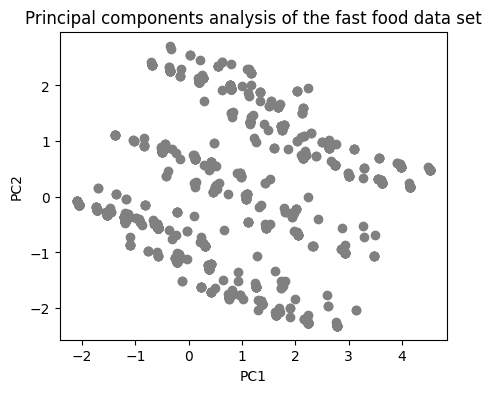

In [160]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# standardizing the data
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

# project the data into PCA Axes
x_pca = pca.transform(x_scaled)

# plotting

plt.figure(figsize = (5,4))
plt.scatter(x_pca[:,0], x_pca[:,1], c = 'grey')
plt.title("Principal components analysis of the fast food data set")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

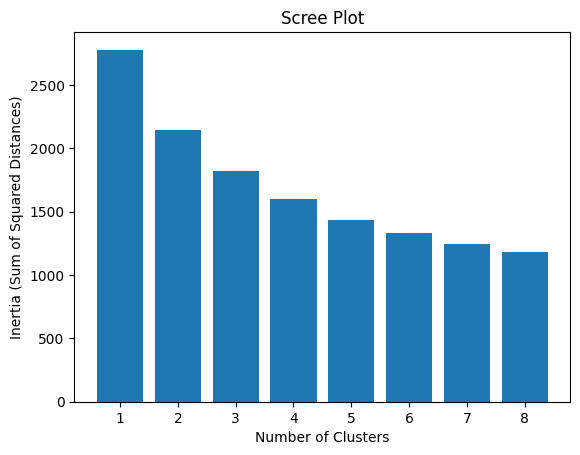

In [161]:
from sklearn.cluster import KMeans

np.random.seed(1234)

# list to store the inertia values
inertia_values = []
nrep = 10
mk = {}

# Calculate the inertia for each number of clusters (from 1 to 10)
for i in range(1, 9):
	kmeans = KMeans(n_clusters=i, n_init=nrep, random_state=1234)
	kmeans.fit(x)
	inertia_values.append(kmeans.inertia_)
	mk[str(i)] = kmeans




# scree plot

plt.bar(range(1, 9), inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Scree Plot')
plt.show()

#  KMeans(n_clusters=n_clusters, init='k-means++', n_init=10)



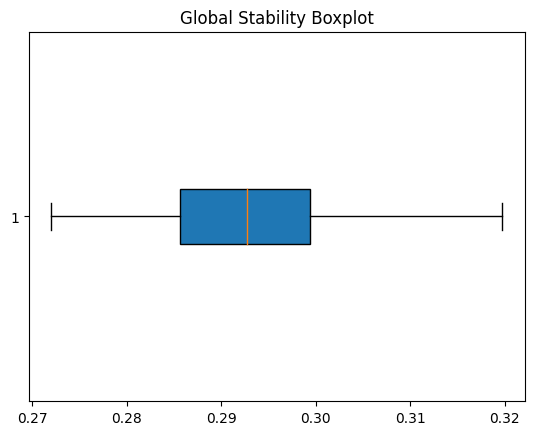

In [162]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

np.random.seed(1234)

n_boot = 100
global_stability = []
for i in range(n_boot):
  x_boot, _ = resample(x, x, replace=True)
  kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10)
  kmeans.fit(x_boot)
  silhouette = silhouette_score(x_boot, kmeans.labels_)
  global_stability.append(silhouette)

plt.boxplot(global_stability, vert=False, patch_artist=True)
plt.title('Global Stability Boxplot')
plt.show()



# result is not as desired output
# still working on it




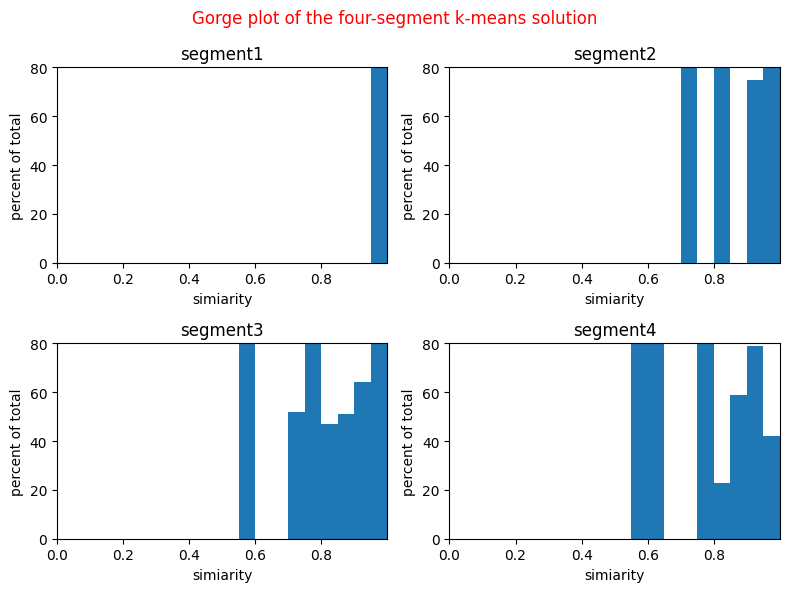

In [163]:
limit = (0,1)
freq = 80
num_bin = 20


fig, axs = plt.subplots(2,2, figsize = (8,6))
plt.suptitle("Gorge plot of the four-segment k-means solution", color = 'red')

for i in range(1,5):
  cluster_labels = mk[str(i)].fit_predict(x)
  similarity = mk[str(i)].transform(x).min(axis =1)
  row = (i-1)//2
  column = (i-1)%2
  result = axs[row, column]
  result.hist(similarity, bins = num_bin, range = limit)
  result.set_xlabel("simiarity")
  result.set_ylabel("percent of total")
  result.set_title('segment{}'.format(i))
  result.set_xlim(limit)
  result.set_ylim(0, freq)
  result.set_xticks([0, 0.2, 0.4, 0.6, 0.8])

plt.tight_layout()
plt.show()


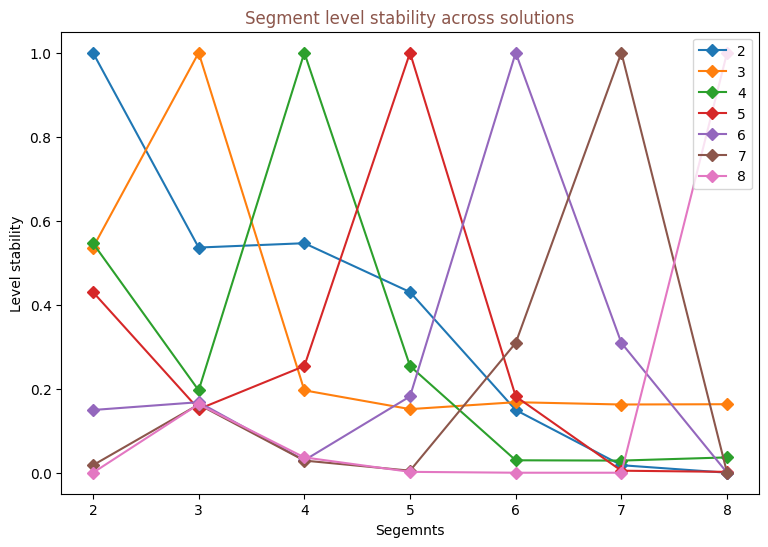

In [164]:
# slsa plot

# empty list to store stabilities

stability = []
for k in range(2,9):
  segment = mk[str(k)].predict(x)
  stability.append(segment)

plt.figure(figsize=(9,6))
for i, k in enumerate(range(2,9)):
  plt.plot(range(2,9), [np.mean(stability[i] == labels) for labels in stability], marker = 'D', label = f'{k}')

plt.title("Segment level stability across solutions", color = 'tab:brown')
plt.xlabel("Segemnts")
plt.ylabel("Level stability")
plt.xticks(range(2,9))
plt.legend()
plt.show()

# print(stability)




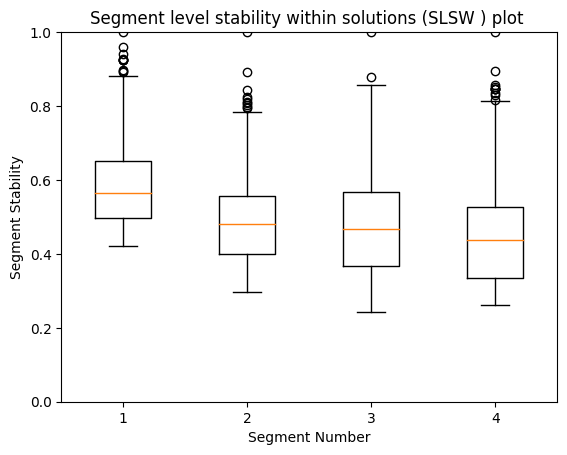

In [165]:
# segment level stability within solutions for the four-segment solution.

dict1 = {}
dict2 = {}
number_segments = ['1','2','3','4']
length = len(number_segments)
stability_value = []

for i in number_segments:
  dict1[i] = mk[i].predict(x)
  dict2[i] = mk[i].transform(x). min(axis =1)
  # transforming the segment solutions and storing it in a dictionary format

for i in number_segments:
  solutions = dict2[i]
  nor_solutions = solutions / np.max(solutions)
  stability_value.append(nor_solutions)

# plotting the boxplot
plt.boxplot(stability_value, whis = 1.5)
plt.title("Segment level stability within solutions (SLSW ) plot ")
plt.xticks(range(1, length + 1), number_segments)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.ylim(0,1)
plt.show()





# print(dict1)
# print(dict2)

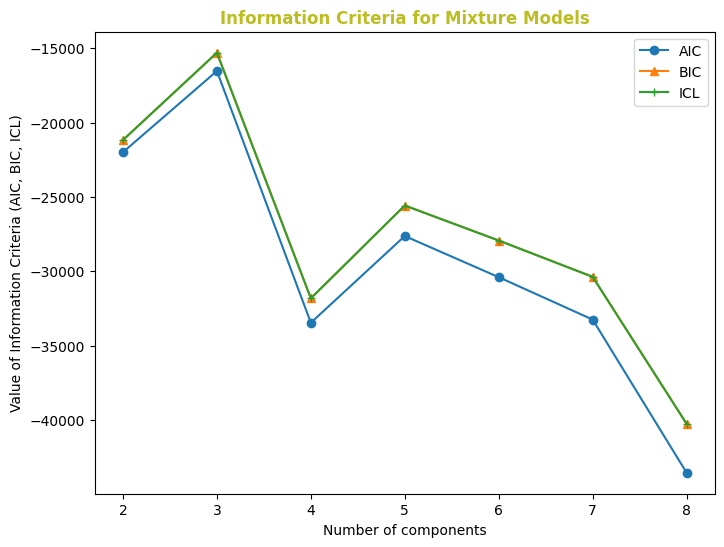

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Comparison Table:
mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164


In [166]:
from sklearn.mixture import GaussianMixture


np.random.seed(1234)



# Defining the range of components (k) for mixture model
k_range = range(2, 9)

# Initialize lists to store AIC, BIC, and ICL values
aic_values = []
bic_values = []
icl_values = []

for k in k_range:
    model = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
    model.fit(x)

    log_likelihood = model.score(x) * len(x)
    bic = model.bic(x)
    aic = model.aic(x)
    icl = bic  # ICL approximation using BIC

    aic_values.append(aic)
    bic_values.append(bic)
    icl_values.append(icl)

# Plotting the information criteria (AIC, BIC, ICL)
plt.figure(figsize=(8, 6))
plt.plot(k_range, aic_values, 'o-', label='AIC')
plt.plot(k_range, bic_values, '^-', label='BIC')
plt.plot(k_range, icl_values, '+-', label='ICL')
plt.xlabel('Number of components')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.title('Information Criteria for Mixture Models', color = 'tab:olive', weight = 'bold')
plt.show()

# Best number of components (k=4) from the given plot
best_k = 4

# Fitting the best Gaussian Mixture Model
best_gmm = GaussianMixture(n_components=best_k, covariance_type='full', random_state=1234)
best_gmm.fit(x)
mixture_clusters = best_gmm.predict(x)

# Clustering using KMeans with k=4
kmeans = KMeans(n_clusters=best_k, random_state=1234)
kmeans.fit(x)
kmeans_clusters = kmeans.labels_

# Create a DataFrame to compare clusters
comparison_df = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': mixture_clusters})
comparison_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'])

print("Cluster Comparison Table:")
print(comparison_table)


In [167]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(x_scaled)

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm.fit_predict(x_scaled)

# Create a DataFrame to compare cluster assignments
comparison_df = pd.DataFrame({'KMeans': kmeans_labels, 'GMM': gmm_labels})

# Print the contingency table
contingency_table = pd.crosstab(comparison_df['KMeans'], comparison_df['GMM'])
print(contingency_table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GMM       0    1    2    3
KMeans                    
0         0   56    2  340
1        10  171  369   61
2         5   66  216   38
3       119    0    0    0


In [168]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(x_scaled)

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(x_scaled)
gmm_labels = gmm.predict(x_scaled)

# Calculate the log-likelihood
log_likelihood = gmm.score_samples(x_scaled).sum()
print(f'Log-likelihood of the fitted GMM: {log_likelihood:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Log-likelihood of the fitted GMM: 875.8693


In [169]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(x_scaled)

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(x_scaled)
gmm_labels = gmm.predict(x_scaled)

log_likelihood = gmm.score_samples(x_scaled).sum()
print("'logLik' {:.3f}".format(log_likelihood))






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'logLik' 875.869


In [170]:
# frequency table of Preference column

like_counts = md_data["Like"].value_counts()
reverse_like_counts = like_counts.iloc[::-1]
print(reverse_like_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [171]:
# print(md_data.columns)

# Assuming 'Like' column is present and needs to be converted to numeric
md_data['Like'] = pd.to_numeric(md_data['Like'], errors='coerce')
count = md_data['Like'].value_counts()
print(count)


Like
 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [172]:
# Generate the formula string for the regression model
predictors = "+".join(md_data.columns[:11])
formula = f"Like.n ~ {predictors}"

print(formula)


Like.n ~ yummy+convenient+spicy+fattening+greasy+fast+cheap+tasty+expensive+healthy+disgusting


In [173]:
np.random.seed(1234)

# Assuming x_scaled is already defined and scaled properly

k = 2  # Number of clusters
n_rep = 10  # Number of repetitions
kmeans = KMeans(n_clusters=k, n_init=n_rep, random_state=1234)
kmeans.fit(x_scaled)

# Get the cluster sizes
cluster_sizes = np.bincount(kmeans.labels_)

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i+1}: {size}")

print(f"Convergence after {kmeans.n_iter_} iterations")


Cluster sizes:
Cluster 1: 916
Cluster 2: 537
Convergence after 8 iterations


In [174]:
features = md_data.columns[:11]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x[features])

# Fit the initial model with KMeans
kmeans_model = KMeans(n_clusters=2, random_state=1234, n_init=10).fit(x_scaled)

# Refit the model using Gaussian Mixture Model (GMM)
gmm_model = GaussianMixture(n_components=2, random_state=1234).fit(x_scaled)


print(f"Means :\n{gmm_model.means_}")
print(f"Weights :\n{gmm_model.weights_}")
print(f"Covariances :\n{gmm_model.covariances_}")

print(f"Lower bound: {gmm_model.lower_bound_}")

Means :
[[-0.54851978 -0.67084221  0.00876984  0.10806107  0.39200146 -0.70076194
  -0.28867991 -0.58233772  0.34995609 -0.23063061  1.19228859]
 [ 0.2606165   0.31873518 -0.00416679 -0.05134272 -0.18625044  0.33295085
   0.13715959  0.27668432 -0.16627355  0.10957881 -0.56648839]]
Weights :
[0.32209222 0.67790778]
Covariances :
[[[ 8.15290440e-01  2.45191256e-01  1.23990005e-01 -8.10863753e-02
   -8.27217257e-02 -2.35317900e-01  6.22344414e-02  6.11583186e-01
    1.91933286e-02  2.04595833e-01 -3.38789705e-01]
  [ 2.45191256e-01  2.44085158e+00  9.84909355e-02  2.20104566e-01
    5.58755807e-02  6.11762681e-02  1.84920583e-01  3.23333376e-01
   -1.62742392e-01  7.98528982e-02  1.21789269e-01]
  [ 1.23990005e-01  9.84909355e-02  1.02439664e+00  2.86816977e-02
    5.14240339e-02  7.20150469e-02  5.12325283e-02  1.31128322e-01
    3.59035198e-02  1.87313961e-01  8.65150660e-02]
  [-8.10863753e-02  2.20104566e-01  2.86816977e-02  7.54510217e-01
    2.96322326e-01  2.53278178e-01  5.878968

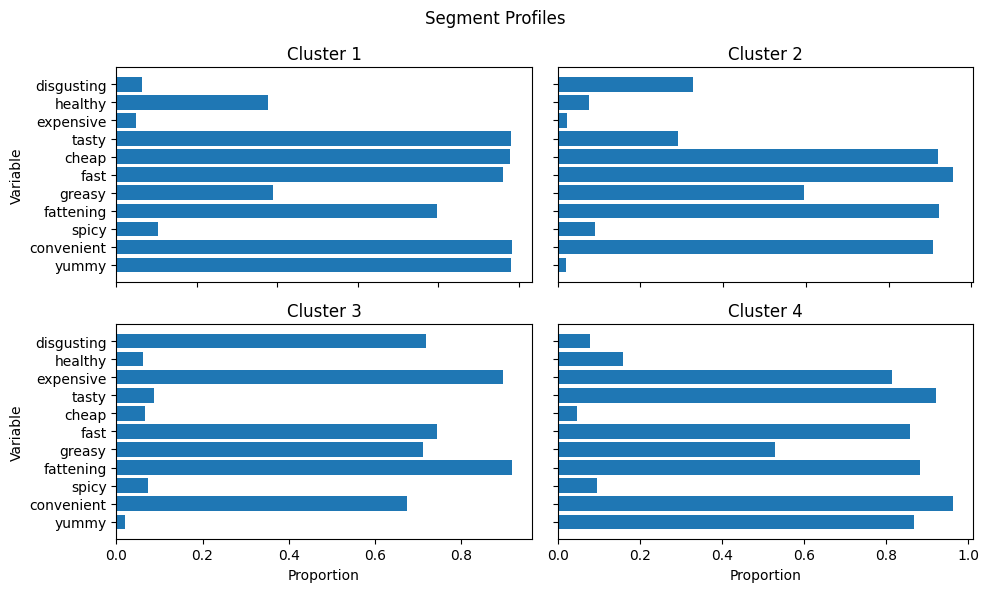

In [175]:
kmeans = mk['4']

labels = kmeans.labels_

MD_mean = x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Cluster 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Cluster 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Cluster 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Cluster 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


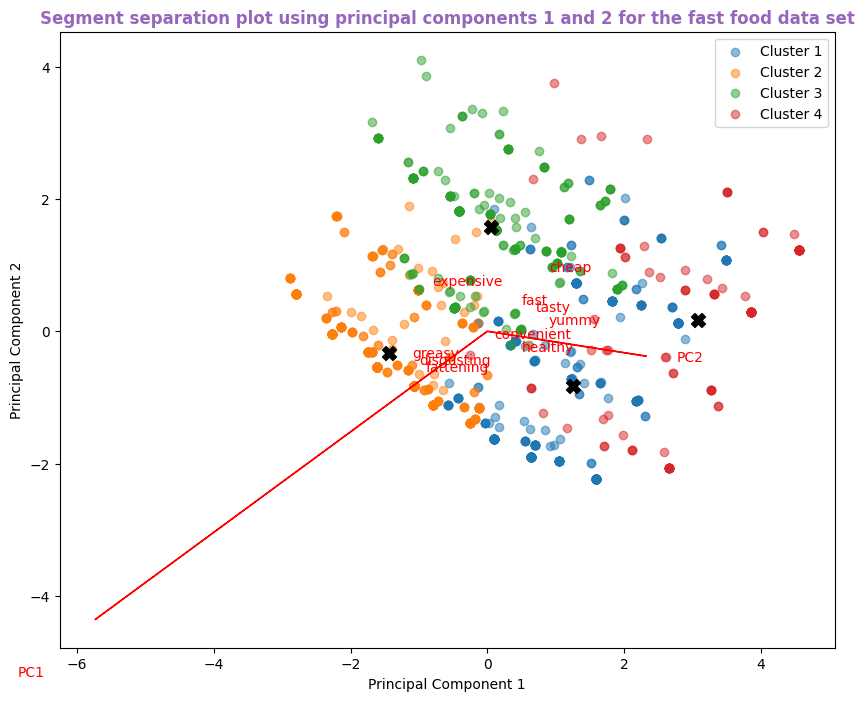

In [176]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(x_scaled)

# Plotting
plt.figure(figsize=(10, 8))

# Scatter plot of the PCA projection
for cluster in np.unique(MD_k4):
    plt.scatter(principal_components[MD_k4 == cluster, 0], principal_components[MD_k4 == cluster, 1], label=f'Cluster {cluster + 1}', alpha=0.5)

# Annotating the plot with the cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', s=100, marker='X')

# Adding labels to the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment separation plot using principal components 1 and 2 for the fast food data set', color = 'tab:purple', weight = 'bold')

# Draw arrows for PCA axes (biplot)
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    plt.arrow(0, 0, comp[0] * var * 5, comp[1] * var * 5, color='r', width=0.005)
    plt.text(comp[0] * var * 6, comp[1] * var * 6, f'PC{i+1}', color='r')

# Add custom text annotations (this will depend on your specific dataset and PCA results)
annotations = ['cheap', 'disgusting', 'fattening', 'greasy', 'convenient', 'fast', 'healthy', 'tasty', 'yummy', 'expensive']
annotation_coords = [
    (0.9, 0.9), (-1.0, -0.5), (-0.9, -0.6), (-1.1, -0.4), (0.1, -0.1), (0.5, 0.4), (0.5, -0.3), (0.7, 0.3), (0.9, 0.1), (-0.8, 0.7)
]

for annotation, (x, y) in zip(annotations, annotation_coords):
    plt.text(x, y, annotation, color='red')

plt.legend()

plt.show()

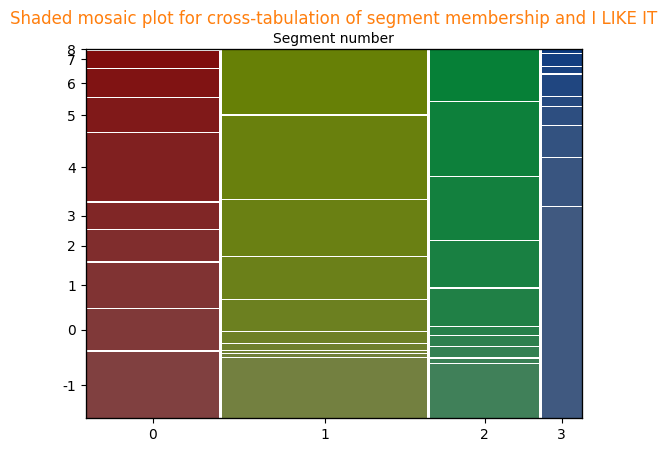

In [177]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product


# Convert 'Like' to numeric for clustering
md_data['Like'] = pd.Categorical(md_data['Like']).codes

# Add the cluster results to the dataframe
md_data['Cluster'] = MD_k4

# Create a contingency table
contingency_table = pd.crosstab(md_data['Cluster'], md_data['Like'])

# Plot the mosaic plot
fig, _ = mosaic(contingency_table.stack(), title="", axes_label=True, labelizer=lambda k: "")
plt.title("Shaded mosaic plot for cross-tabulation of segment membership and I LIKE IT", color = 'tab:orange')
plt.xlabel('Segment number')
plt.show()

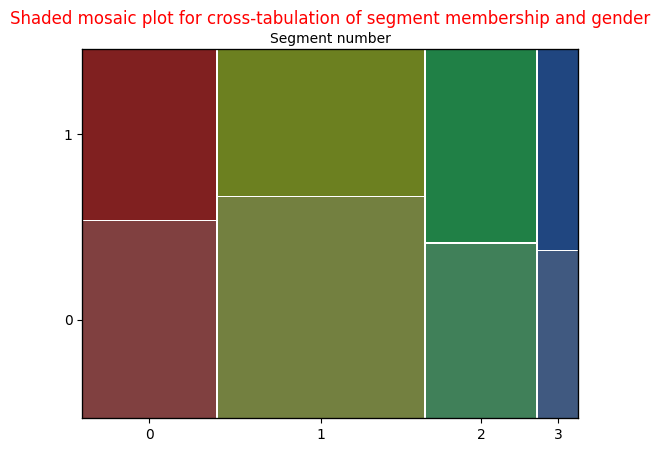

In [178]:
md_data['Gender'] = pd.Categorical(md_data['Gender']).codes

# Add the cluster results to the dataframe
md_data['Cluster'] = MD_k4

# Create a contingency table
contingency_table = pd.crosstab(md_data['Cluster'], md_data['Gender'])

# Plot the mosaic plot
fig, _ = mosaic(contingency_table.stack(), title="", axes_label=True, labelizer=lambda k: "")
plt.title("Shaded mosaic plot for cross-tabulation of segment membership and gender", color = 'red')
plt.xlabel('Segment number')
plt.show()

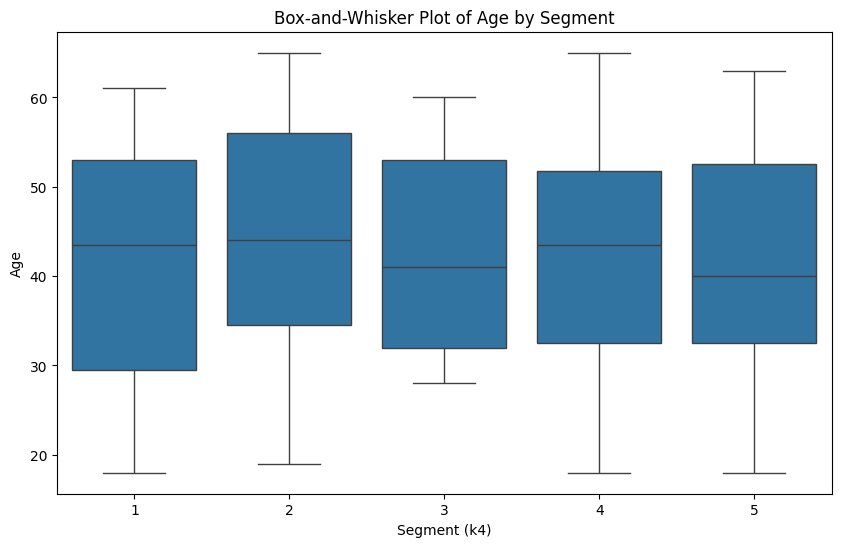

In [179]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
np.random.seed(123)
md_data = pd.DataFrame({
    'k4': np.random.choice(range(1, 6), 100, replace=True),
    'Like.n': np.random.uniform(1, 5, 100),
    'Age': np.random.choice(range(18, 66), 100, replace=True),
    'VisitFrequency': pd.Categorical(np.random.choice(['Rarely', 'Sometimes', 'Often'], 100, replace=True),
                                     categories=['Rarely', 'Sometimes', 'Often']),
    'Gender': pd.Categorical(np.random.choice(['Male', 'Female'], 100, replace=True),
                             categories=['Male', 'Female'])
})

# Create a parallel box-and-whisker plot of Age by k4 segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='k4', y='Age', data=md_data)
plt.xlabel('Segment (k4)')
plt.ylabel('Age')
plt.title('Box-and-Whisker Plot of Age by Segment')
plt.show()


In [180]:
from sklearn.preprocessing import LabelEncoder

MD_x_encoded = pd.get_dummies(md_data, drop_first=True)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x_encoded)

# Add the cluster results to the dataframe
md_data['Cluster'] = MD_k4

# Convert 'VisitFrequency' to numeric
le = LabelEncoder()
md_data['VisitFrequency'] = le.fit_transform(md_data['VisitFrequency'])

# Calculate the mean 'VisitFrequency' for each cluster
visit_mean = md_data.groupby('Cluster')['VisitFrequency'].mean()

print(visit_mean)

Cluster
0    1.117647
1    1.206897
2    0.862069
3    0.880000
Name: VisitFrequency, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [181]:
# Calculate the mean 'Like.n' for each cluster
like_mean = md_data.groupby('Cluster')['Like.n'].mean()

print(like_mean)

Cluster
0    2.965201
1    2.840510
2    3.027121
3    2.666117
Name: Like.n, dtype: float64


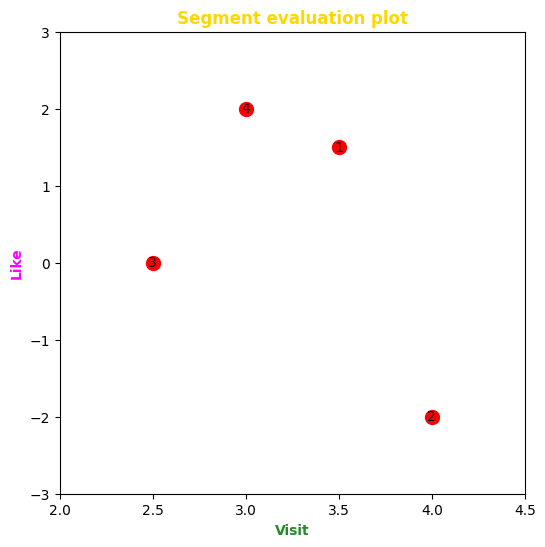

In [182]:
visit = [3.5, 4.0, 2.5, 3.0]
like = [1.5, -2.0, 0.0, 2.0]
female = [0.1, 0.2, 0.15, 0.3]
sizes = [10 * f for f in female]  # Multiply by 10 to get sizes

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(visit, like, s=sizes, edgecolors='black', facecolors='none', marker = 'o')

for i, (x, y) in enumerate(zip(visit, like), 1):
    plt.text(x, y, str(i), ha='center', va='center')

for x, y in zip(visit, like):
    plt.plot(x, y, marker='o', markersize=10, color='red')


plt.xlim(2, 4.5)
plt.ylim(-3, 3)

plt.title("Segment evaluation plot", color = "gold", weight = 'bold')
plt.xlabel('Visit', color = 'forestgreen', weight = 'bold')
plt.ylabel('Like', color = 'magenta', weight = 'bold')

# Show the plot
plt.show()